<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/210116_MissingValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2021.1.16 데이터의 전처리: 결측치 채우기

**결측치**를 다루는 방법은 크게 두가지이다.
- 결측치를 제거한다.
- 결측치를 대체한다.

코드를 통해 절차와 함께 정리하려고 한다.

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

자주쓰는 패키지와, 결측값을 채우기 위한 패키지를 불러왔다.
데이터는 seaborn의 titanic 데이터와 함께할 것이다.

In [51]:
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## 1단계. 결측치 확인하기

우선, 이 데이터들에 결측치가 얼마나 있나부터 확인할려고 한다.

In [3]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

확인 결과 age에는 177개, embarked와 embark_town에는 2개의 결측치가,
그리고 deck에는 무려 688개의 결측치가 존재한다.

titanic.tail()을 통해서도 알 수 있지만, 준비된 데이터는 총 890개이다.
deck을 활용하기에는 결측치가 너무 많아서 도저히 쓸 수가 없다. **이럴 때에는 열 자체를 제거해버리면 된다.**

## 2. 결측치의 제거 작업

그럼 먼저 'deck' 열 자체를 drop시켜 버리자.

In [52]:
titanic.drop('deck', axis=1, inplace=True)  # 열을 없애야 하므로 axis = 1
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


embarked는 2개밖에 결측치가 없으므로 다음 선택 중 한가지가 가능해보인다.
- 최빈값으로 대체한다.
- 결측치가 있는 2줄을 삭제한다.

여기서는 다음 세 가지를 해보려고 한다.

1. 결측치가 어느 줄에 있는지 확인
2. 그 결측치가 있는 줄들을 없앤다.
3. 그 후, 인덱스를 새로 갱신한다.

In [53]:
# Step 1
# 'embark'의 결측 여부가 True인 줄에 대해 모든 것을 출력해라.
titanic.loc[ titanic.loc[:,'embarked'].isna() == True, :]

# Step 2
# 위와 반대로 결측치가 아닌 것들만 추출해버리면
titanic = titanic.loc[ titanic.loc[:,'embarked'].isna() == False ,:]

# Step 3
# index를 리셋시키자. 이상태로 두면 인덱스 몇개가 짤려나간다.
titanic = titanic.reset_index()  # 이 경우 기존 인덱스가 붙어버린다.
titanic = titanic.drop('index', axis = 1) # 없애자.

titanic.tail()
titanic.isna().sum()  # embarked를 해결하니까, embark_town도 같이 없어졌다.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

##3. 결측치의 대체 작업

결측치의 대체는 두 가지 방법이 있다.
- 단일값 대체 : 모두 다 동일한 값으로 대체해버린다. 대표값 사용.
- 이웃값 대체 : 이웃값을 참조하여 거리가 가장 가까운 애를 대체


우선은, 단일값 대체부터 내용을 확인해 보자. titanic_age 변수를 채워보려고 한다. 우선 단일값 대체를 위해 분포를 확인하려고 한다.

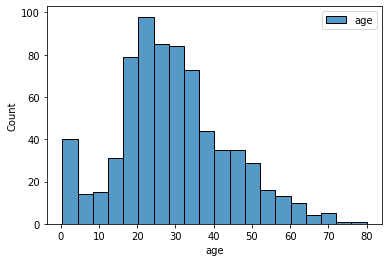

In [20]:
sns.histplot(data = titanic['age'], bins=20, label = 'age')
plt.legend()
plt.show()

나이 분포를 검증 결과, 20~30대에 많이 몰려있음을 알 수 있다.
'나이'의 특성을 고려하면 평균으로 대체하는 것이 좋음을 알 수 있다.
'나이'의 결측치를 대체하려고 한다.

In [49]:
titanic2 = titanic
avg_age = titanic2['age'].mean()  # np.mean은 결측치를 제외하고 하기에, 이 값으로 대체하면 된다.
titanic2.loc[:,'age'] = titanic2.loc[:,'age'].fillna(avg_age)
titanic2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
885,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
886,0,3,female,29.642093,1,2,23.4500,S,Third,woman,False,Southampton,no,False
887,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


다른 한 가지 방법은 이웃값 대체이다.

이는 **kNN(k-Nearest Neighbor)**을 활용한다.
우선 sklearn을 활용한 코드부터 확인한다.

In [54]:
titanic3 = titanic
num_set = np.array(titanic3.loc[:, ['age', 'pclass', 'sibsp', 'parch', 'fare']])
imputer = KNNImputer(n_neighbors=3, weights="uniform")
titanic3['age'] = imputer.fit_transform(num_set)[:,0]

titanic3.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
884,0,2,male,27.000000,0,0,13.00,S,Second,man,True,Southampton,no,True
885,1,1,female,19.000000,0,0,30.00,S,First,woman,False,Southampton,yes,True
886,0,3,female,25.333333,1,2,23.45,S,Third,woman,False,Southampton,no,False
887,1,1,male,26.000000,0,0,30.00,C,First,man,True,Cherbourg,yes,True
888,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,Queenstown,no,True


## 4. kNN이란??

kNN이란 원래 **분류 모델** 중의 하나로, 분류하려는 sample중에서 k개의 최근접 이웃 sample등을 고려하는 모델이다. 이를 결측치 처리의 관점에서 해석하면 다음과 같다.

1. 확인하려는 포인트 개수 k와 거리를 재는 방법을 결정한다.

2. 결측치에서 k개의 최근접 이웃 데이터들을 확인한다.

3. 그 후, 해당 k개의 채우려는 변수들의 가장 가까운 값의 평균을 채운다.

Remark. 분류 모델일 경우 다수결을 통해 단독 1등을 결정하는 방식으로 활용한다.

분류 모델을 기준으로 하는 그림이지만, 그림을 통해 알고리즘을 직관적으로 파악해보자.
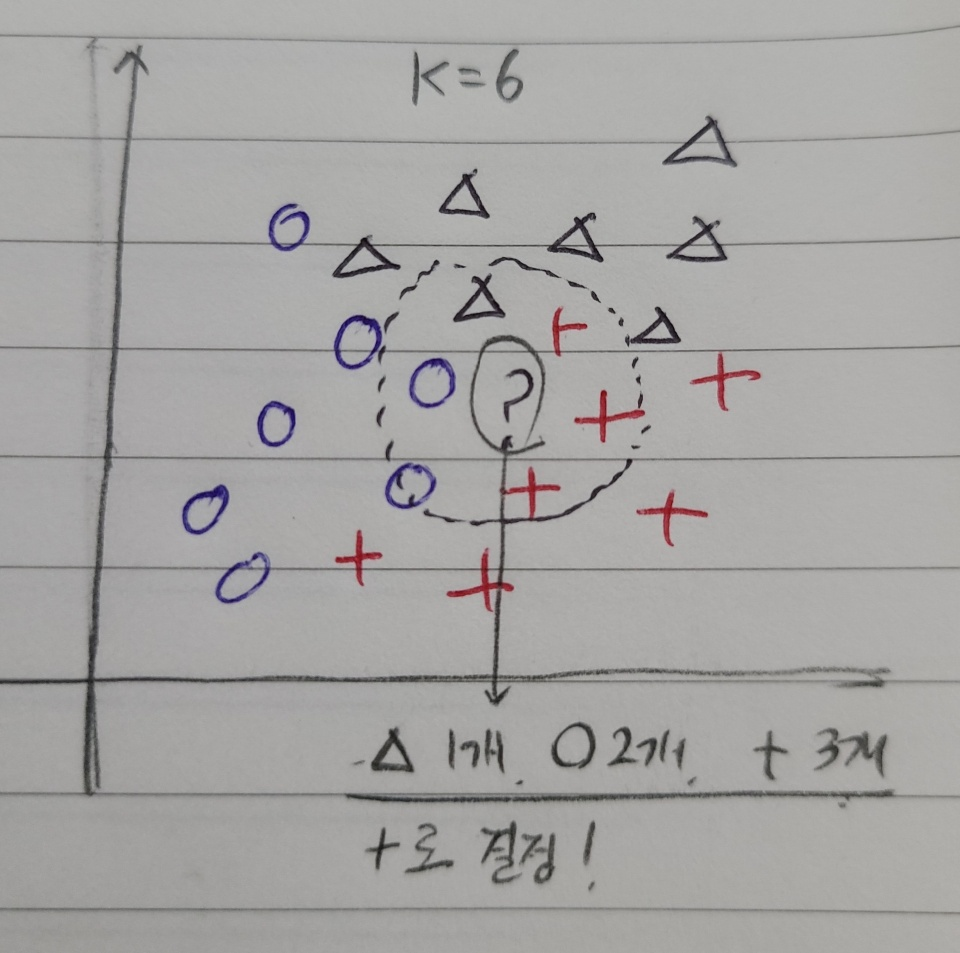

kNN 기법의 장점으로는 수집된 새 훈련 data에서 즉시 적용할 수 있다는 점이 있다.

하지만, k값이 커질수록 계산이 복잡해지며 샘플을 버릴수가 없어 저장공간을 많이 잡아먹게 된다.

하지만 한 가지 의문이 들 것이다. NaN 값이 껴있는데 어떻게 거리가 계산이 가능할까? 이에 대한 답을 간단하게 정리하고자 한다.

## 5. Nan-Euclidean Distance

위에서 확인한 KNNimputer는 기본적으로 Nan-Euclidean Distance를 기준으로 한다.
이에 대한 공식은 다음과 같다.

$$ d_{xy} = \sqrt{weight * present \, distance}$$

여기서 weight의 경우

$$ weight = \frac{Total \, Number \, of  \, Coords.}
{Number \, of  \, present \, Coords.}$$

로 계산한다. 이게 무슨소리야!

실제 예제를 통해 무슨 소리이니 해설하려고 한다.

Example)  (5, NaN, 3) 과 (1, 3, 6)의 Nan-Euclidean Distance 를 구해보자.

$$Weight = \frac{3}{2}$$

그 이유는, 성분은 3개가 있는데, 두 좌표간의 거리를 계산할 때, 거리를 구할 수 있는, 즉 성분이 2개가 모두 다 살아있는 성분은 2개이다. 

present distance.의 경우는 다음과 같이 구한다.
$$ \sqrt{(5 - 1) ^{2} + (3 - 6) ^ {2}} = 5 $$

따라서, 최종 Nan-Euclidean distance는 7.5가 된다.
